In [2]:
import numpy as np
import cv2 as cv
import scipy.signal
import matplotlib.pyplot as plt

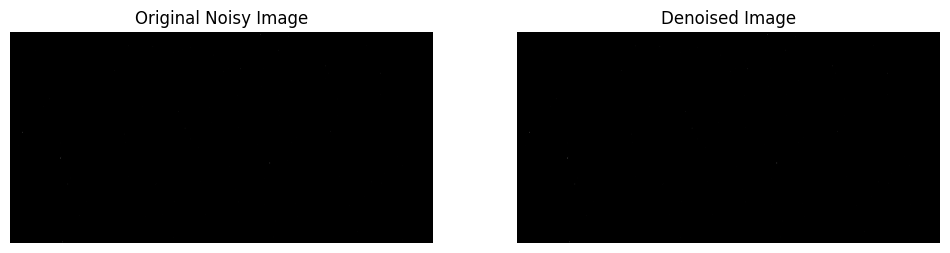

True

In [ ]:
def apply_gaussian_denoise(image_path, sigma=2, kernel_size=7):
    image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)
    
    if image is None:
        raise FileNotFoundError("Image not found. Check the path!")

    def gaussian_kernel(size, sigma):
        k = size // 2
        x, y = np.meshgrid(np.linspace(-k, k, size), np.linspace(-k, k, size))
        kernel = np.exp(-(x**2 + y**2) / (2 * sigma**2))
        return kernel / np.sum(kernel)

    kernel = gaussian_kernel(kernel_size, sigma)

    denoised_image = scipy.signal.convolve2d(image, kernel, mode='same', boundary='symm')

    return image, denoised_image

def plot_results(original, denoised):
    """ Display original and denoised images side by side. """
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(original, cmap='gray')
    plt.title("Original Noisy Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(denoised, cmap='gray')
    plt.title("Denoised Image")
    plt.axis('off')

    plt.show()

# Example usage
image_path = "ursa_minor_1.jpg"  
original, denoised = apply_gaussian_denoise(image_path)
plot_results(original, denoised)
cv.imwrite("denoised_ursa_minor_2.jpg", denoised)

